In [ ]:
!pip install ethicml==0.2.2 -q

# TASK 1 (STANDARD MODEL - ADULT DATASET)
###Using LOGSTIC REGRESSION

In [ ]:
# Task 1 reworking with ethhicml
import ethicml as em
import json
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
dataset = em.adult(split="Sex", binarize_nationality=True)
data = dataset.load()
train, test = em.train_test_split(data, train_percentage=0.7)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = MinMaxScaler()
train.x[dataset.continuous_features] = scale_orig.fit_transform(train.x[dataset.continuous_features])
test.x[dataset.continuous_features] = scale_orig.transform(test.x[dataset.continuous_features])

C_arr = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparams = {"C": C_arr}

In [ ]:
data.x.isnull().sum()

education_10th       0
education_11th       0
education_12th       0
education_1st-4th    0
education_5th-6th    0
                    ..
age                  0
capital-gain         0
capital-loss         0
education-num        0
hours-per-week       0
Length: 62, dtype: int64

In [ ]:
# Below we see that the dataset features have been adequately preprocessed. This mean that 
len(dataset.discrete_features)+len(dataset.continuous_features), len(data.x.columns)

(62, 62)

In [ ]:
print(data.x.shape)
data.x.head()

(45222, 62)


,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,age,capital-gain,capital-loss,education-num,hours-per-week
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,37,0,0,10,40
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,33,0,0,9,40
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,38,0,0,7,40
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,23,0,0,10,9
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,21,0,0,4,38


In [ ]:
data.x.columns

Index(['education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'native-country_United-States', 'native-country_not_United-States',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-se

In [ ]:
data.s

,sex_Male
0,1
1,1
2,1
3,1
4,0
...,...
45217,0
45218,1
45219,1
45220,1


In [ ]:
data.s.value_counts()

sex_Male
1           30527
0           14695
dtype: int64

In [ ]:
data.y.head()

,salary_>50K
0,0
1,0
2,0
3,0
4,0


In [ ]:
data.y.value_counts()

salary_>50K
0              34014
1              11208
dtype: int64

In [ ]:
# Our custom functions 

# Extract training metrics
def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


# Plot Result
def plot_acc_fairness(acc_s, fair_s, C_arr):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()


def higheset_model_metric(metric, payload): #input metric "Accuracy" for accuracy and "CV absolute" for fairness
  c, score = 0, 0
  result = {}
  for C, results in payload.items():
    if score <= results[2][metric]:
      c = results[0]['C']
      score = results[2][metric]
      result["Accuracy"] = results[2]["Accuracy"]
      result["CV absolute"] = results[2]["CV absolute"]
  return (c, result)

fold: 0, model: 'Logistic Regression (C=100)', Accuracy=0.8397, CV absolute=0.8041, completed!
fold: 0, model: 'Logistic Regression (C=10)', Accuracy=0.8392, CV absolute=0.8058, completed!
fold: 0, model: 'Logistic Regression (C=1)', Accuracy=0.8392, CV absolute=0.804, completed!
fold: 0, model: 'Logistic Regression (C=0.1)', Accuracy=0.8332, CV absolute=0.8077, completed!
fold: 0, model: 'Logistic Regression (C=0.01)', Accuracy=0.8267, CV absolute=0.8035, completed!
fold: 0, model: 'Logistic Regression (C=0.001)', Accuracy=0.8045, CV absolute=0.8458, completed!
fold: 0, model: 'Logistic Regression (C=0.0001)', Accuracy=0.7436, CV absolute=1, completed!
fold: 1, model: 'Logistic Regression (C=100)', Accuracy=0.8458, CV absolute=0.8191, completed!
fold: 1, model: 'Logistic Regression (C=10)', Accuracy=0.8462, CV absolute=0.8188, completed!
fold: 1, model: 'Logistic Regression (C=1)', Accuracy=0.8432, CV absolute=0.8221, completed!
fold: 1, model: 'Logistic Regression (C=0.1)', Accuracy=

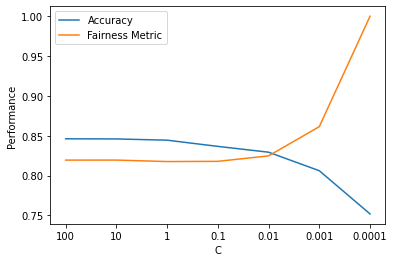

In [ ]:
cv = em.CrossValidator(em.LR, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results_1 = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results_1.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results_1.mean_storage)
print(cv_results_1.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results_1.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
print(higheset_model_metric("CV absolute", cv_results_1.mean_storage))

(0.0001, {'Accuracy': 0.7518875375138209, 'CV absolute': 1.0})


In [ ]:
m1_acc = higheset_model_metric(
    "Accuracy", 
    cv_results_1.mean_storage
    )
print(f"Highest Accuracy Model (1) \nC: {m1_acc[0]}")
print(f"Training Acc: {m1_acc[1]['Accuracy']}")
print(f"CV absolute: {m1_acc[1]['CV absolute']}\n")
# Test the higest ACCURACY Model on the Test Set
learner = em.LR(C=m1_acc[0])
predictions = learner.run(train, test)
print("Test Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (1) 
C: 100
Training Acc: 0.8461854367398516
CV absolute: 0.8194270805986164

Test Accuracy 0.8489717697353873
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.08067785872663924}}


In [ ]:
m2_acc = higheset_model_metric(
    "CV absolute", 
    cv_results_1.mean_storage
    )
print(f"Highest Accuracy Model (2) \nC: {m2_acc[0]}")
print(f"Training Acc: {m2_acc[1]['Accuracy']}")
print(f"CV absolute: {m2_acc[1]['CV absolute']}\n")
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.0001 Training Accuracy = 0.8006192182755117, Fairness Metric = 0.936600078520044
# The equivalent of the above, but in just EthicML
learner = em.LR(C=m2_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (2) 
C: 0.0001
Training Acc: 0.7518875375138209
CV absolute: 1.0

Accuracy 0.7527824869167834
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.0003484320557491289}}


# TASK 2 (FAIRNESS MODEL)
###Using Reweighing

fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8387, CV absolute=0.8937, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8394, CV absolute=0.8901, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8379, CV absolute=0.8898, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8323, CV absolute=0.8993, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8209, CV absolute=0.9038, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.7924, CV absolute=0.9423, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.7436, CV absolute=1, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8402, CV absolute=0.9024, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.84, CV absolute=0.9031, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8362, CV absolute=0.9043, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8277, CV absolute=0.9092, completed!
fold: 1, model: 'Kamiran & Calders LR',

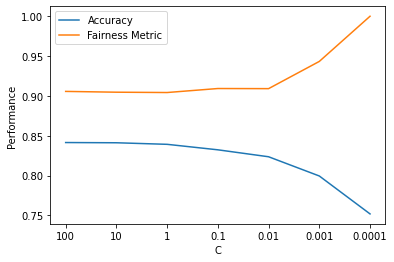

In [ ]:
# Task 2 reweighing
cv = em.CrossValidator(em.Kamiran, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results_2 = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results_2.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results_2.mean_storage)
print(cv_results_2.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results_2.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
m3_acc = higheset_model_metric(
    "Accuracy", 
    cv_results_2.mean_storage
    )
print(f"Highest Accuracy Model (3) \nC: {m3_acc[0]}")
print(f"Training Acc: {m3_acc[1]['Accuracy']}")
print(f"CV absolute: {m3_acc[1]['CV absolute']}\n")
# Test the higest ACCURACY Model on the Test Set
learner = em.Kamiran(C=m3_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (3) 
C: 100
Training Acc: 0.8414784394250513
CV absolute: 0.905663394410261

Accuracy 0.8437384830839537
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.13366112822875575}}


In [ ]:
m4_acc = higheset_model_metric(
    "CV absolute", 
    cv_results_2.mean_storage
    )
print(f"Highest Accuracy Model (3) \nC: {m4_acc[0]}")
print(f"Training Acc: {m4_acc[1]['Accuracy']}")
print(f"CV absolute: {m4_acc[1]['CV absolute']}\n")
# Test the higest FAIRNESS on the Test Set
learner = em.Kamiran(C=m4_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (3) 
C: 0.0001
Training Acc: 0.7518875375138209
CV absolute: 1.0

Accuracy 0.7527824869167834
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.0}}


# Task 3 (Extra): Model Selection Strategy
### Using my custom Accuracy-Fairness Metric Score

### Formular:


*   (Accuracy * Abs(Fairness)) * 100
or
*   (Accuracy * Abs(1-Equal opportunity difference)) * 100



In [ ]:
def model_strategy_metric(payload):
  C = []
  scores = []
  for results in payload.values():
    C.append(results[0]['C'])
    acc = results[2]["Accuracy"]
    fair = results[2]["CV absolute"]
    scores.append(np.tanh(np.arctanh(acc)*np.arctanh(fair)))
  return C, scores


def show_cal_results(C, scores):
  for i in range(len(C)):
    print(f"C:{C[i]} = {scores[i]}")


def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


def plot_ccr(C_arr, acc_s, fair_s, scores):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")

  y2 = np.array(scores)
  plt.plot(y2, label="New Criteria score")
  
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()


def new_metric(C, scores):
  score = 0
  for i in range(len(C)):
    if score <= scores[i]:
      c = C[i]
      score = scores[i]
  return [c, score]

ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL
C:100 = 0.8927375535708967
C:10 = 0.8926007187033725
C:1 = 0.8898929459424462
C:0.1 = 0.8835663569630136
C:0.01 = 0.883034422529996
C:0.001 = 0.8955406452034095
C:0.0001 = 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


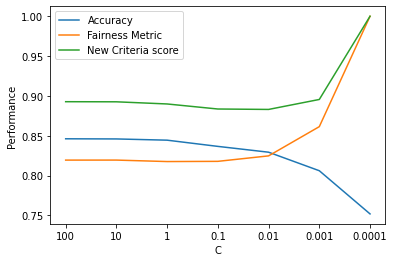

In [ ]:
# Model Selection Strategy on the Standard Model 1 and 2

# loading the 5 fold cross validation results of the STANDARD Model
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL")
standard_model_result = cv_results_1.mean_storage
C, scores = model_strategy_metric(standard_model_result)
show_cal_results(C, scores)
a, f = acc_fair_extraction(standard_model_result)
plot_ccr(C, a, f, scores)

In [ ]:
print("FOR THE STANDARD MODEL (5) - BASED OFF THE NEW CRITERIA SCORE")
print(f"THE BEST ACCURACY-FAIRNESS MODEL \nC= {new_metric(C, scores)[0]} & Score {new_metric(C, scores)[1]*100}\n")
print("TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW CRITERIA SCORE")
# Test the higest FAIRNESS on the Test Set
learner = em.LR(C=new_metric(C, scores)[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['sex_Male_0-sex_Male_1'])*100}")

FOR THE STANDARD MODEL (5) - BASED OFF THE NEW CRITERIA SCORE
THE BEST ACCURACY-FAIRNESS MODEL 
C= 0.0001 & Score 100.0

TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW CRITERIA SCORE
Accuracy 0.7527824869167834
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.0003484320557491289}}
TEST ACCURACY-FAIRNESS SCORE = 75.25201933673351


C:100 = 0.9510660318119459
C:10 = 0.9502716982002709
C:1 = 0.949021811773104
C:0.1 = 0.9489884683117861
C:0.01 = 0.9445056135238789
C:0.001 = 0.9594460977480179
C:0.0001 = 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


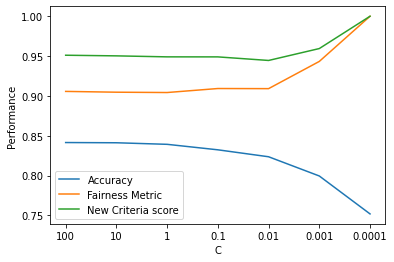

In [ ]:
# loading the 5 fold cross validation results of the FAIRNESS-BASED Model
fairness_model_results = cv_results_2.mean_storage
C_2, scores_2 = model_strategy_metric(fairness_model_results)
show_cal_results(C_2, scores_2)
a_2, f_2 = acc_fair_extraction(fairness_model_results)
plot_ccr(C_2, a_2, f_2, scores_2)

In [ ]:
print("FOR THE FAIRNESS MODEL (6) - BASED OFF THE NEW CRITERIA SCORE")
print(f"THE BEST ACCURACY-FAIRNESS MODEL \nC= {new_metric(C_2, scores_2)[0]} & Score {new_metric(C_2, scores_2)[1]*100}\n")
print("TEST SCORE FOR FAIRNESS MODEL - BASED OFF NEW CRITERIA SCORE")
learner = em.Kamiran(C=new_metric(C_2, scores_2)[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['sex_Male_0-sex_Male_1'])*100}")

FOR THE FAIRNESS MODEL (6) - BASED OFF THE NEW CRITERIA SCORE
THE BEST ACCURACY-FAIRNESS MODEL 
C= 0.0001 & Score 100.0

TEST SCORE FOR FAIRNESS MODEL - BASED OFF NEW CRITERIA SCORE
Accuracy 0.7527824869167834
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.0}}
TEST ACCURACY-FAIRNESS SCORE = 75.27824869167834


In [ ]:
np.log(np.exp(1))

1.0

In [ ]:
np.exp((np.log(0.5*100)+np.log(0.5*100)))/100

24.999999999999996

In [ ]:
np.exp(1)-np.exp

TypeError: ignored

In [ ]:
np.log((np.exp(0.8)*np.exp(0.8))/2)

In [ ]:
# np.sqrt()
res = [np.sqrt(0.3**2+0.5**2), np.sqrt(0.4**2+0.5**2), np.sqrt(0.5**2+0.5**2), np.sqrt(0.6**2+0.5**2), np.sqrt(0.7**2+0.5**2)]
res

In [ ]:
for i, j in enumerate(res):
  if i < 4:
    print(res[i+1] - res[i])

In [ ]:
0.58309518948453 - 0.6403124237432849

In [ ]:
np.tanh(0.9)